In [1]:
import pandas as pd
import numpy as np
import random as rd
import scipy.stats
import statsmodels.api as sm
import datetime as dt

In [2]:
### Loading the data
df = pd.read_csv("C:/Users/andre/Documents/Analysis_Projects/FinalProject/owid-covid-data.csv")
df.head()

### We also want to make sure we fix the date column.
df["date"] = pd.to_datetime(df["date"])
df.replace(np.nan, 0, inplace = True)
countries_df = df[df.continent != 0]
countries_df = countries_df.loc[countries_df["location"] != countries_df["continent"]]

In [3]:
### Take only the columns we want

countries_df = countries_df[["iso_code", "continent", "location", "date", "new_cases", "new_deaths", "total_cases", "total_deaths", "reproduction_rate", "hosp_patients", "new_tests", "total_tests", "positive_rate", "new_vaccinations", "population", "median_age", "hospital_beds_per_thousand" ]]

countries_df.head()

,iso_code,continent,location,date,new_cases,new_deaths,total_cases,total_deaths,reproduction_rate,hosp_patients,new_tests,total_tests,positive_rate,new_vaccinations,population,median_age,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
1,AFG,Asia,Afghanistan,2020-02-25,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
2,AFG,Asia,Afghanistan,2020-02-26,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
3,AFG,Asia,Afghanistan,2020-02-27,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
4,AFG,Asia,Afghanistan,2020-02-28,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5


In [34]:
### In order to clean this data, we didn't want to drop the null so we decided to replace it with zero instead.
countries_df.to_csv("cleaned_data_andrea.csv", index = False)

In [5]:
### Grouping the countries in levels of risk of COVID by looking at the total cases.

grouped_df = countries_df.groupby("location")
grouped_lists = grouped_df["total_cases"].mean()
grouped_lists = grouped_lists.reset_index()

# grouped_lists.describe()

grouped_lists = grouped_lists.sort_values(by=["total_cases"])

# Grouping the list by aver  age of total_cases
low = grouped_lists[0:75]
med = grouped_lists[75:150]
high = grouped_lists[150:]

In [6]:
# Creating a new column to determine
countries_df['risk_level'] = ['low' if x<=max(low["total_cases"]) else 'med' if min(med["total_cases"])<=x<=max(med["total_cases"]) else 'high' for x in countries_df['total_cases']]

In [7]:
low["location"].unique()

array(['Sint Maarten (Dutch part)', 'Niue', 'Tokelau', 'Northern Cyprus',
       'Turkmenistan', 'Tuvalu', 'Guernsey', 'Jersey', 'Nauru',
       'Pitcairn', 'Tonga', 'Micronesia (country)', 'Cook Islands',
       'Kiribati', 'Samoa', 'Vanuatu', 'Saint Helena', 'Marshall Islands',
       'Palau', 'Solomon Islands', 'Vatican', 'Montserrat',
       'Saint Pierre and Miquelon', 'Falkland Islands', 'Macao',
       'Anguilla', 'Wallis and Futuna', 'Greenland',
       'Saint Kitts and Nevis', 'British Virgin Islands',
       'Bonaire Sint Eustatius and Saba', 'Faeroe Islands', 'Bhutan',
       'Dominica', 'Antigua and Barbuda', 'Cayman Islands', 'Grenada',
       'Turks and Caicos Islands', 'Saint Vincent and the Grenadines',
       'Monaco', 'Sao Tome and Principe', 'Bermuda', 'New Caledonia',
       'Liechtenstein', 'Comoros', 'Brunei', 'Liberia', 'Isle of Man',
       'Gibraltar', 'Chad', 'Eritrea', 'San Marino', 'New Zealand',
       'Guinea-Bissau', 'Sierra Leone', 'Niger', 'Saint Lucia'

In [8]:
med["location"].unique()

array(['Benin', 'Burkina Faso', 'Congo', 'Andorra', 'Mali', 'Lesotho',
       'Bahamas', 'Papua New Guinea', 'Somalia', 'Togo', 'Belize',
       'Tajikistan', 'Fiji', 'Haiti', 'Laos', 'Guyana', 'Suriname',
       'Gabon', 'Guinea', 'Mauritania', 'Syria', 'French Polynesia',
       'Cape Verde', 'Eswatini', 'Malta', 'Trinidad and Tobago', 'Sudan',
       'Madagascar', 'Angola', 'Democratic Republic of Congo', 'Malawi',
       'Cambodia', "Cote d'Ivoire", 'Senegal', 'Jamaica', 'Rwanda',
       'Maldives', 'Luxembourg', 'Cameroon', 'Uganda', 'Cyprus',
       'Zimbabwe', 'Namibia', 'El Salvador', 'Mozambique', 'Botswana',
       'Montenegro', 'Finland', 'Ghana', 'Kosovo', 'Afghanistan',
       'Australia', 'Estonia', 'Singapore', 'Albania', 'Latvia', 'China',
       'Uzbekistan', 'Zambia', 'Kyrgyzstan', 'Mongolia', 'Norway',
       'North Macedonia', 'Algeria', 'Nigeria', 'Kenya',
       'Bosnia and Herzegovina', 'South Korea', 'Bahrain', 'Libya',
       'Armenia', 'Slovenia', 'Qatar', 'Ur

In [9]:
high["location"].unique()

array(['Sri Lanka', 'Moldova', 'Egypt', 'Honduras', 'Ethiopia',
       'Lithuania', 'Venezuela', 'Myanmar', 'Palestine', 'Denmark',
       'Dominican Republic', 'Paraguay', 'Kuwait', 'Ireland', 'Guatemala',
       'Croatia', 'Vietnam', 'Azerbaijan', 'Costa Rica', 'Cuba',
       'Bolivia', 'Panama', 'Bulgaria', 'Belarus', 'Ecuador', 'Tunisia',
       'Georgia', 'Greece', 'Lebanon', 'Nepal', 'United Arab Emirates',
       'Saudi Arabia', 'Kazakhstan', 'Morocco', 'Jordan', 'Austria',
       'Thailand', 'Hungary', 'Serbia', 'Slovakia', 'Switzerland',
       'Japan', 'Portugal', 'Sweden', 'Israel', 'Pakistan', 'Malaysia',
       'Bangladesh', 'Belgium', 'Romania', 'Canada', 'Iraq', 'Chile',
       'Philippines', 'Czechia', 'Netherlands', 'Peru', 'South Africa',
       'Ukraine', 'Indonesia', 'Poland', 'Mexico', 'Iran', 'Germany',
       'Argentina', 'Colombia', 'Italy', 'Spain', 'Turkey', 'France',
       'United Kingdom', 'Russia', 'Brazil', 'India', 'United States'],
      dtype=object)

In [10]:
### Get 3 countries out of each
def pick_three():
    a = []
    
    low_cn = low.sample()
    low_cn = low_cn["location"].to_string()
    
    med_cn = med.sample()
    med_cn = med_cn["location"].to_string()
    
    high_cn = high.sample()
    high_cn = high_cn["location"].to_string()
    
    a.append(low_cn)
    a.append(med_cn)
    a.append(high_cn)
    
    new = []
    for index in a:
        for i,x in enumerate(index):
            if x.isalpha():      #True if its a letter
                pos = i 
                break
        b = index[pos:]
        new.append(b)
    
    return new

In [11]:
### Testing the function pick_three()
a = pick_three()
a

['Liechtenstein', 'Sudan', 'Bangladesh']

In [12]:
### Now we can get to the ML Model

In [13]:
def make_df():
    countries = pick_three()
    new_df = pd.DataFrame(columns = countries_df.columns)
    entries = []

    for i in countries_df["location"]:
        if i in countries:
            entry = countries_df.loc[countries_df['location'] == i]
            entries.append(entry)

    found_df = pd.concat(entries)
    result_df = pd.concat([new_df, found_df])
    
    return result_df

In [14]:
### Now, we obviously want to see the correlation
def tests_vs_cases():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_tests"]
    data1_col2 = data1["new_cases"]

    data2_col1 = data2["new_tests"]
    data2_col2 = data2["new_cases"]

    data3_col1 = data3["new_tests"]
    data3_col2 = data3["new_cases"]

    data1_corr = data1_col1.corr(data1_col2, method = "pearson")
    data2_corr = data2_col1.corr(data2_col2, method = "pearson")
    data3_corr = data3_col1.corr(data3_col2, method = "pearson")
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    total_tests_1 = data1_col1.to_list()
    total_cases_1 = data1_col2.to_list()
    total_tests_1, total_cases_1 = np.array(total_tests_1), np.array(total_cases_1)
    total_tests_1 = sm.add_constant(total_tests_1)
    model1 = sm.OLS(total_cases_1, total_tests_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new tests administered and the new cases in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
   # print(f"Model summary for: " + data1["location"].unique()[0] + ".")
   # print(results1.summary())
   # print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_cases_2 = data2_col2.to_list()
    total_tests_2, total_cases_2 = np.array(total_tests_2), np.array(total_cases_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_cases_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new tests administered and the new cases in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
   # print(f"Model summary for: " + data2["location"].unique()[0] + ".")
   # print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_cases_3 = data3_col2.to_list()
    total_tests_3, total_cases_3 = np.array(total_tests_3), np.array(total_cases_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_cases_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new tests administered and the new cases in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
  #  print(f"Model summary for: " + data3["location"].unique()[0] + ".")
   # print(results3.summary())
    #print("------------------------------------------------------------------------------------------------")

    return a

In [15]:
test = tests_vs_cases()

Low Risk: The correlation coefficient between the new tests administered and the new cases in Cayman Islands is nan
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new tests administered and the new cases in Congo is nan
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new tests administered and the new cases in Paraguay is 0.4468857333652721
------------------------------------------------------------------------------------------------


# Now we will move on to seeing whether the tests and deaths

In [16]:
def tests_vs_deaths():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_tests"]
    data1_col2 = data1["new_deaths"]

    data2_col1 = data2["new_tests"]
    data2_col2 = data2["new_deaths"]

    data3_col1 = data3["new_tests"]
    data3_col2 = data3["new_deaths"]

    data1_corr = data1_col1.corr(data1_col2, method = "pearson")
    data2_corr = data2_col1.corr(data2_col2, method = "pearson")
    data3_corr = data3_col1.corr(data3_col2, method = "pearson")
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    total_tests_1 = data1_col1.to_list()
    total_deaths_1 = data1_col2.to_list()
    total_tests_1, total_deaths_1 = np.array(total_tests_1), np.array(total_deaths_1)
    total_tests_1 = sm.add_constant(total_tests_1)
    model1 = sm.OLS(total_deaths_1, total_tests_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new tests administered and the new deaths in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    total_tests_2, total_deaths_2 = np.array(total_tests_2), np.array(total_deaths_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_deaths_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new tests administered and the new deaths in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
 #   print(f"Model summary for: " + data2["location"].unique()[0] + ".")
  #  print(results2.summary())
   # print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new tests administered and the new deaths in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
#    print(f"Model summary for: " + data3["location"].unique()[0] + ".")
 #   print(results3.summary())
  #  print("------------------------------------------------------------------------------------------------")

    return a

In [17]:
deaths = tests_vs_deaths()

Low Risk: The correlation coefficient between the new tests administered and the new deaths in Guinea-Bissau is nan
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new tests administered and the new deaths in Lithuania is 0.47148260309654233
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new tests administered and the new deaths in South Korea is 0.6497487124277705
------------------------------------------------------------------------------------------------


In [18]:
def vacs_vs_cases():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_vaccinations"]
    data1_col2 = data1["total_cases"]

    data2_col1 = data2["new_vaccinations"]
    data2_col2 = data2["total_cases"]

    data3_col1 = data3["new_vaccinations"]
    data3_col2 = data3["total_cases"]

    data1_corr = data1_col1.corr(data1_col2)
    data2_corr = data2_col1.corr(data2_col2)
    data3_corr = data3_col1.corr(data3_col2)
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    new_vacs_1 = data1_col1.to_list()
    total_cases_1 = data1_col2.to_list()
    new_vacs_1, total_cases_1 = np.array(new_vacs_1), np.array(total_cases_1)
    new_vacs_1 = sm.add_constant(new_vacs_1)
    model1 = sm.OLS(total_cases_1, new_vacs_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    total_tests_2, total_deaths_2 = np.array(total_tests_2), np.array(total_deaths_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_deaths_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data2["location"].unique()[0] + ".")
 #   print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
#    print(f"Model summary for: " + data3["location"].unique()[0] + ".")
 #   print(results3.summary())
  #  print("------------------------------------------------------------------------------------------------")

    return a

In [19]:
vacscases = vacs_vs_cases()

Low Risk: The correlation coefficient between the new vaccines administered and the new cases in Belize is 0.07206313003822566
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new vaccines administered and the new cases in Jordan is 0.36252059504326833
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new vaccines administered and the new cases in Nicaragua is nan
------------------------------------------------------------------------------------------------


In [20]:
def vacs_vs_deaths():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_vaccinations"]
    data1_col2 = data1["new_deaths"]

    data2_col1 = data2["new_vaccinations"]
    data2_col2 = data2["new_deaths"]

    data3_col1 = data3["new_vaccinations"]
    data3_col2 = data3["new_deaths"]

    data1_corr = data1_col1.corr(data1_col2)
    data2_corr = data2_col1.corr(data2_col2)
    data3_corr = data3_col1.corr(data3_col2)
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    new_vacs_1 = data1_col1.to_list()
    total_deaths_1 = data1_col2.to_list()
    new_vacs_1, total_deaths_1 = np.array(new_vacs_1), np.array(total_deaths_1)
    new_vacs_1 = sm.add_constant(new_vacs_1)
    model1 = sm.OLS(total_deaths_1, new_vacs_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    new_vacs_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    new_vacs_2, total_deaths_2 = np.array(new_vacs_2), np.array(total_deaths_2)
    new_vacs_2 = sm.add_constant(new_vacs_2)
    model2 = sm.OLS(total_deaths_2, new_vacs_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data2["location"].unique()[0] + ".")
 #   print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
 #   print(f"Model summary for: " + data3["location"].unique()[0] + ".")
  #  print(results3.summary())
   # print("------------------------------------------------------------------------------------------------")

    return a

In [21]:
vacsdeaths = vacs_vs_deaths()

Low Risk: The correlation coefficient between the new vaccinations administered and the new deaths in Bahamas is -0.011248606170009452
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new vaccinations administered and the new deaths in Israel is 0.6198639375784082
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new vaccinations administered and the new deaths in Tanzania is nan
------------------------------------------------------------------------------------------------


In [26]:
### These would be used for Tableau

asia_df = countries_df[countries_df["continent"] == "Asia"]
europe_df = countries_df[countries_df["continent"] == "Europe"]
na_df = countries_df[countries_df["continent"] == "North America"]
sa_df = countries_df[countries_df["continent"] == "South America"]
oceania_df = countries_df[countries_df["continent"] == "Oceania"]
africa_df = countries_df[countries_df["continent"] == "Africa"]

asia_df.to_csv("asia_df.csv", index = False)
europe_df.to_csv("europe_df.csv", index = False)
na_df.to_csv("northamerica_df.csv", index = False)
sa_df.to_csv("southamerica_df.csv", index = False)
oceania_df.to_csv("oceania_df.csv", index = False)
africa_df.to_csv("africa_df.csv", index = False)

In [27]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

### Tests vs Cases

In [28]:
### Tests vs Cases
t_vs_c = make_df()

t_vs_c["location"].unique()

array(['Marshall Islands', 'Slovenia', 'Venezuela'], dtype=object)

In [29]:
first = t_vs_c.loc[t_vs_c["location"] == t_vs_c["location"].unique()[0]]
second = t_vs_c.loc[t_vs_c["location"] == t_vs_c["location"].unique()[1]]
third = t_vs_c.loc[t_vs_c["location"] == t_vs_c["location"].unique()[2]]
dates = t_vs_c["date"]

nan


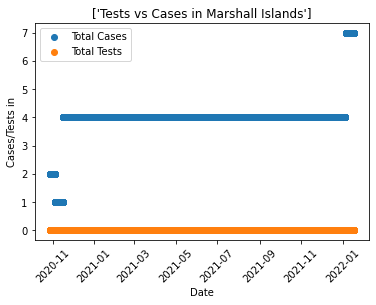

In [30]:
tests1 = first["total_tests"]
cases1 = first["total_cases"]
corr1 = tests1.corr(cases1, method = "pearson")
print(corr1)

tests1, cases1 = np.array(tests1), np.array(cases1)
tests1 = sm.add_constant(tests1)
model1 = sm.OLS(cases1, tests1)
results1 = model1.fit()

fc = pd.DataFrame(first, columns = ['date', 'total_cases'])
ft = pd.DataFrame(first, columns = ['date', 'total_tests'])
fc = plt.scatter(fc['date'], fc['total_cases'], label = 'Total Cases')
ft = plt.scatter(ft['date'], ft['total_tests'], label = 'Total Tests')
plt.title(f'Tests vs Cases in ' + first['location'].unique())
plt.xticks(rotation = 45)
plt.ylabel('Cases/Tests in')
plt.xlabel('Date')
#plt.scatter(first['date'], results1.fittedvalues, label = 'OLS')
plt.legend()

In [31]:
tests2 = second["total_tests"]
cases2 = second["total_cases"]
corr2 = tests2.corr(cases2, method = "pearson")
corr2

0.9719325293192326

In [32]:
tests3 = third["total_tests"]
cases3 = third["total_cases"]
corr3 = tests3.corr(cases3, method = "pearson")
corr3

nan